# I. The Problem

How to improve Americans' physical fitness? According to researchers at Penn State and the University of Maryland, who analyzed data from the US Census Bureau, Americans, on average, spend only two hours per week being physically active. This is just half of the four hours a week of physical activity recommended by the Centers for Disease Control (CDC) and Prevention. Strong evidence shows that physical inactivity increases the risk of many adverse health conditions, including major non-communicable diseases such as coronary heart disease, type 2 diabetes, and breast and colon cancers, and shortens life expectancy. Because much of the world's population is inactive, this link presents a major public health issue. 

# II. The Potential Solution

A fitness app that educates users to adopt healthy living habits, motivates them to improve their physical fitness, and tracks their progress.

# III. The Method of Testing the Solution

## A. Metrics Selection

The primary success metric will be defined as a reduction in participants' body mass indices (BMI) towards the healthy range (18.5 - 24.9). However, since BMI changes may not necessarily represent participants' health habits, secondary metrics such as physical activity (i.e., active hours per week), muscle mass, and food nutrition knowledge will also be tracked and measured. Possible contradictions between metrics will be monitored - for example: BMI and muscle mass are both health metrics, but weight loss to achieve a healthy BMI range could result in lower muscle mass.

## B. Sample Identification

In the absence of publicly available data on weight across different ethnicities in the U.S., data will be randomly generated to represent the population from which samples will be taken. Data generation will be based on metrics available from federal agencies such as the Centers for Disease Control (CDC) and Prevention, and National Institutes of Health, among others; for example, average height, weight, and waist circumference on U.S. males and females published on the CDC website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Create two dataframes - male and female - based on U.S. data from the CDC on average height, weight, waist circumference, and active hours per week.
np.random.seed(123)
a = ['american_indian', 'asian', 'black', 'native_hawaiian', 'white']
ethnicity = []
for item in range(1,501):
    gender = 'male'
    height = 2.9*np.random.randn(500)+69.2
    weight = 30.7*np.random.randn(500)+195.7
    waist_circ = 1.5*np.random.randn(500)+40
    active_hours = .5*np.random.randn(500)+2
    ethnicity.append(np.random.choice(a))
    age = np.random.uniform(18,64,500)    
df_male = pd.DataFrame({'gender':gender, 'ethnicity':ethnicity, 'height_in':height, 'weight_lbs':weight, 'age': age, 'waist_circ_in':waist_circ, 'active_hours':active_hours})
df_male.head()

,active_hours,age,ethnicity,gender,height_in,waist_circ_in,weight_lbs
0,2.034456,56.215100,asian,male,67.418172,39.400325,243.248681
1,2.299914,61.191163,native_hawaiian,male,69.457883,40.285621,197.122717
2,1.876303,52.763637,black,male,65.614105,38.873148,184.175215
3,1.810099,51.892246,asian,male,65.492886,38.646407,206.647124
4,2.506292,18.460413,american_indian,male,69.966709,39.878703,192.983147


In [3]:
a = ['american_indian', 'asian', 'black', 'native_hawaiian', 'white']
ethnicity = []
for item in range(1,501):
    gender = 'female'
    height = 2.7*np.random.randn(500)+63.7
    weight = 26.4*np.random.randn(500)+168.5
    waist_circ = 1.2*np.random.randn(500)+38.1
    active_hours = .5*np.random.randn(500)+2
    ethnicity.append(np.random.choice(a))
    age = np.random.uniform(18,24,500)
df_female = pd.DataFrame({'gender':gender, 'ethnicity':ethnicity, 'height_in':height, 'weight_lbs':weight, 'age': age, 'waist_circ_in':waist_circ, 'active_hours':active_hours})
df_female.head()

,active_hours,age,ethnicity,gender,height_in,waist_circ_in,weight_lbs
0,2.479531,23.711067,american_indian,female,61.624100,37.541360,193.064739
1,2.146087,18.272936,white,female,59.951749,38.700928,159.387652
2,1.873809,22.441478,black,female,63.473118,39.777741,138.756409
3,1.747645,20.359513,white,female,66.656148,37.707290,216.209771
4,2.460772,23.119882,white,female,64.129918,38.776771,166.589825


In [4]:
# Combine the male and female dataframes.
df = pd.concat([df_male, df_female]).sample(frac=1).reset_index(drop=True)

# Calculate and create a BMI column.
df['bmi'] = (df['weight_lbs']/df['height_in']**2)*703

# Create a category column based on BMI.
def category(x):
    if x < 18.5:
        return 'underweight'
    elif 18.5 <= x <= 24.9:
        return 'healthy'
    elif 25 <= x <= 29.9:
        return 'overweight'
    else: 
        return 'obese'
df['category'] = df['bmi'].apply(category)
df.head()

,active_hours,age,ethnicity,gender,height_in,waist_circ_in,weight_lbs,bmi,category
0,1.067008,37.340855,american_indian,male,67.308224,39.383029,173.164414,26.870622,overweight
1,2.479382,33.067020,asian,male,71.398094,39.053159,164.518414,22.688021,healthy
2,1.889276,40.216586,black,male,71.794519,41.338261,186.889721,25.489315,overweight
3,1.869348,20.140602,white,female,64.283958,36.421488,154.911892,26.353291,overweight
4,1.975693,35.907238,black,male,68.075111,39.930730,183.755469,27.875257,overweight


In [5]:
# Show the resulting gender distribution by category.
df.groupby(['category', 'gender']).size()

category     gender
healthy      female     98
             male       87
obese        female    227
             male      213
overweight   female    168
             male      194
underweight  female      7
             male        6
dtype: int64

The following visualizations present the breakdowns and correlations of the data.

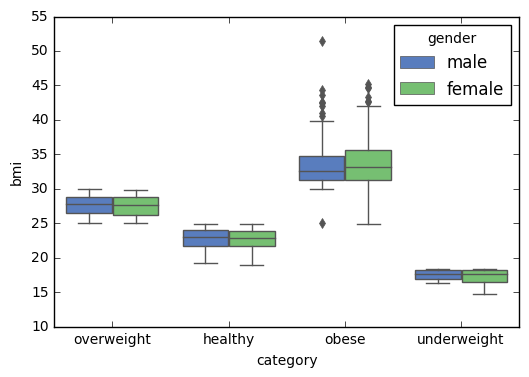

In [6]:
# Boxplot showing distribution of BMI by gender and category.
sns.boxplot(x='category', y='bmi', hue='gender', palette='muted', data=df);

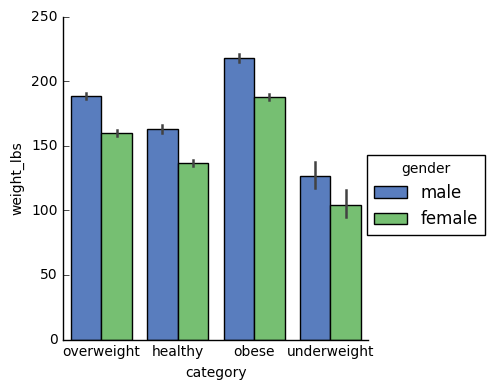

In [7]:
# Error bars for weight and gender/category.
sns.factorplot(x='category', y='weight_lbs', hue='gender', palette='muted', data=df, kind='bar');

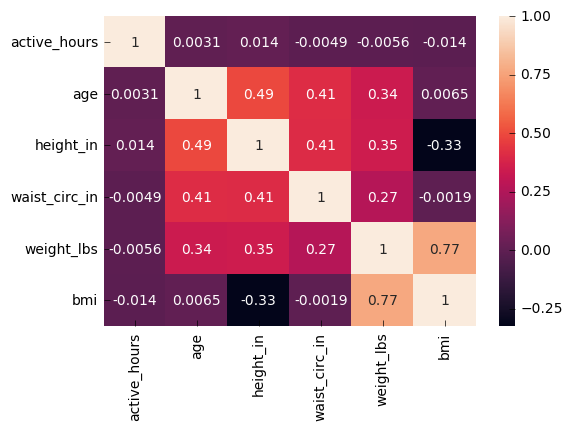

In [8]:
# Correlation among variables.
corr = df.corr()
sns.heatmap(corr,annot=True);
# The heatmap shows a strong correlation between weight and BMI.

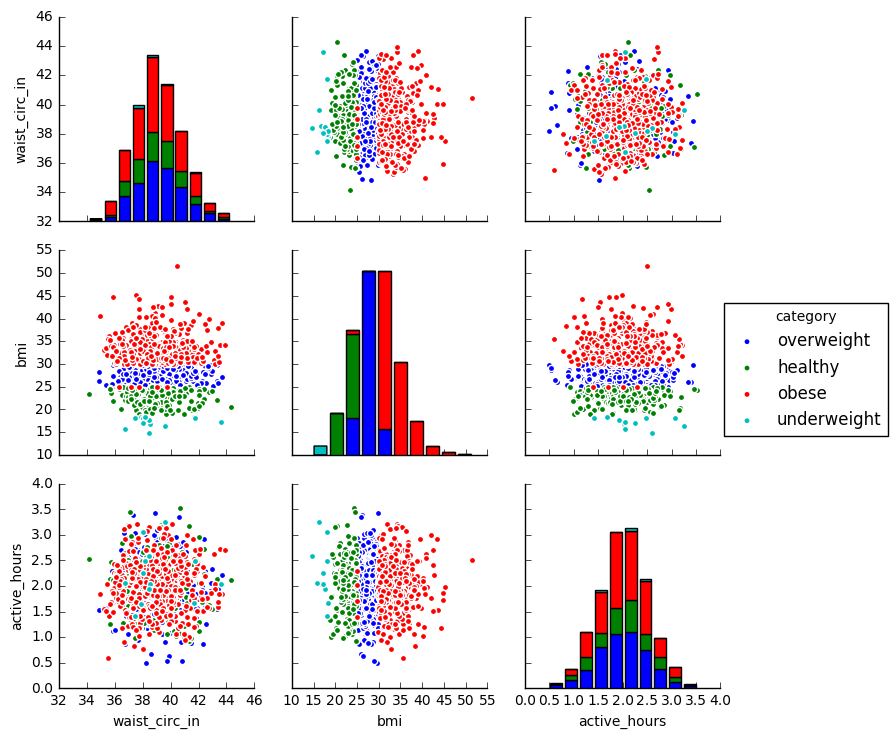

In [9]:
# A pairplot showing correlations among three specific variables.
df1 = df[['category','waist_circ_in','bmi','active_hours']]
sns.pairplot(df1, hue='category');

### 1. Sampling Method

Two groups of participants will be randomly sampled. The experimental group (B) will have the app installed on their phones, while the other group (A, control) will not. Both groups should have similar characteristics with respect to age, gender and fitnes levels to ensure changes oberved can be attributed to the app rather than to other factors.

Ensure appropriate sampling methods to avoid confounding and ceiling effects. For example, if Group B consisted of mostly educated participants who might be better at implementing the desired results (i.e., confounding), thus inflating the app's effectiveness. Or, participants who are at the peak of physical fitness prior to the start of the experiment (i.e., ceiling), since incremental improvements might not be detected. To avoid such effects and to enable more pronounced BMI changes that can be easily tracked and measured, participants will be selected from the obese population to form groups A and B. 

### 2. Sample Size

Groups A and B will have the same size. A larger sample will be needed to detect small changes and if BMIs fluctuate greatly among participants. Python’s statsmodels module will be used to calculate sample size with the following parameters: 

 - The difference between the null and experimental means is assumed to be 1, i.e., a one-point difference in BMI.
 - The standard deviation of the difference between the means is assumed to be 3, which yields a standardized effect size of 1/3.
 - The significance level (alpha) is set to 0.05.
 - Power is set to 0.8.
 - The ratio between the two groups' sample sizes is 1, i.e., both groups have the same number of participants.
 - The alternative is "two-sided," i.e., a two-tailed t-test since the experiment will look into not only the positive effect of the app, but a possible negative effect as well. 

In [10]:
from statsmodels.stats.power import tt_ind_solve_power

mean_diff, sd_diff = 1, 3
std_effect_size = mean_diff / sd_diff

n = tt_ind_solve_power(effect_size=std_effect_size, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
print('Sample size per group: {}'.format(n))

Sample size per group: 142.24625223287106


In [11]:
# Find the total sample size, i.e., first integer greater than n and a multiple of the number of genders (2) and ethnicities (5).
sample_size = next(i for i in range(1000) if i > int(np.ceil(n)) and i % 2 == 0 and i % 5 == 0)

# The total sample size will be evenly divided among the five ethnicites for each gender.
sample_eth = int(sample_size / (2*5))
print ('Sample size per ethnicity: {}'.format(sample_eth))

Sample size per ethnicity: 15


In [12]:
# Group the obese population by gender and ethnicity.
df_omai = df[(df['category'] == 'obese') & (df['gender'] == 'male') & (df['ethnicity'] == 'american_indian')]
df_oma = df[(df['category'] == 'obese') & (df['gender'] == 'male') & (df['ethnicity'] == 'asian')]
df_omb = df[(df['category'] == 'obese') & (df['gender'] == 'male') & (df['ethnicity'] == 'black')]
df_omn = df[(df['category'] == 'obese') & (df['gender'] == 'male') & (df['ethnicity'] == 'native_hawaiian')]
df_omw = df[(df['category'] == 'obese') & (df['gender'] == 'male') & (df['ethnicity'] == 'white')]
df_ofai = df[(df['category'] == 'obese') & (df['gender'] == 'female') & (df['ethnicity'] == 'american_indian')]
df_ofa = df[(df['category'] == 'obese') & (df['gender'] == 'female') & (df['ethnicity'] == 'asian')]
df_ofb = df[(df['category'] == 'obese') & (df['gender'] == 'female') & (df['ethnicity'] == 'black')]
df_ofn = df[(df['category'] == 'obese') & (df['gender'] == 'female') & (df['ethnicity'] == 'native_hawaiian')]
df_ofw = df[(df['category'] == 'obese') & (df['gender'] == 'female') & (df['ethnicity'] == 'white')]

# Randomly select 15 participants from each ethicity.
df_A_omai = df_omai.take(np.random.permutation(len(df_omai))[:sample_eth])
df_A_oma = df_oma.take(np.random.permutation(len(df_oma))[:sample_eth])
df_A_omb = df_omb.take(np.random.permutation(len(df_omb))[:sample_eth])
df_A_omn = df_omn.take(np.random.permutation(len(df_omn))[:sample_eth])
df_A_omw = df_omw.take(np.random.permutation(len(df_omw))[:sample_eth])
df_A_ofai = df_ofai.take(np.random.permutation(len(df_ofai))[:sample_eth])
df_A_ofa = df_ofa.take(np.random.permutation(len(df_ofa))[:sample_eth])
df_A_ofb = df_ofb.take(np.random.permutation(len(df_ofb))[:sample_eth])
df_A_ofn = df_ofn.take(np.random.permutation(len(df_ofn))[:sample_eth])
df_A_ofw = df_ofw.take(np.random.permutation(len(df_ofw))[:sample_eth])

df_B_omai = df_omai.take(np.random.permutation(len(df_omai))[:sample_eth])
df_B_oma = df_oma.take(np.random.permutation(len(df_oma))[:sample_eth])
df_B_omb = df_omb.take(np.random.permutation(len(df_omb))[:sample_eth])
df_B_omn = df_omn.take(np.random.permutation(len(df_omn))[:sample_eth])
df_B_omw = df_omw.take(np.random.permutation(len(df_omw))[:sample_eth])
df_B_ofai = df_ofai.take(np.random.permutation(len(df_ofai))[:sample_eth])
df_B_ofa = df_ofa.take(np.random.permutation(len(df_ofa))[:sample_eth])
df_B_ofb = df_ofb.take(np.random.permutation(len(df_ofb))[:sample_eth])
df_B_ofn = df_ofn.take(np.random.permutation(len(df_ofn))[:sample_eth])
df_B_ofw = df_ofw.take(np.random.permutation(len(df_ofw))[:sample_eth])

# Combine corresponding participants and assign to groups A and B.
df_A = pd.concat([df_A_omai, df_A_oma, df_A_omb, df_A_omn, df_A_omw, df_A_ofai, df_A_ofa, df_A_ofb, df_A_ofn, df_A_ofw])
df_B = pd.concat([df_B_omai, df_B_oma, df_B_omb, df_B_omn, df_B_omw, df_B_ofai, df_B_ofa, df_B_ofb, df_B_ofn, df_B_ofw])

In [13]:
# Show characteristics of Group A.
df_A.groupby(['category', 'gender', 'ethnicity']).size()

category  gender  ethnicity      
obese     female  american_indian    15
                  asian              15
                  black              15
                  native_hawaiian    15
                  white              15
          male    american_indian    15
                  asian              15
                  black              15
                  native_hawaiian    15
                  white              15
dtype: int64

In [14]:
df_A.describe()

,active_hours,age,height_in,waist_circ_in,weight_lbs,bmi
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.047438,30.080700,65.082936,39.239060,203.368602,33.744615
std,0.512812,12.453276,3.576725,1.852888,25.137802,3.155090
min,0.600970,18.095195,56.077716,35.212393,148.504341,24.953198
25%,1.743626,21.051254,62.941845,37.822740,185.380214,31.457955
50%,2.030549,23.340943,64.976676,39.179792,199.760795,32.924719
75%,2.380700,38.349601,67.353644,40.497456,218.539916,35.472104
max,3.214817,62.725645,74.251905,43.907647,291.342587,44.684133


In [15]:
# Show characteristics of Group B.
df_B.groupby(['category', 'gender', 'ethnicity']).size()

category  gender  ethnicity      
obese     female  american_indian    15
                  asian              15
                  black              15
                  native_hawaiian    15
                  white              15
          male    american_indian    15
                  asian              15
                  black              15
                  native_hawaiian    15
                  white              15
dtype: int64

In [16]:
df_B.describe()

,active_hours,age,height_in,waist_circ_in,weight_lbs,bmi
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.085562,31.798645,65.343004,39.074146,203.195660,33.437767
std,0.503611,14.393010,3.545905,1.745193,25.632760,3.223508
min,0.774878,18.095195,56.890728,35.659659,127.137189,24.906517
25%,1.733187,20.649255,62.883028,37.810399,185.327990,31.195089
50%,2.122829,23.427248,65.372073,38.846160,200.502720,32.827938
75%,2.431249,43.069666,67.828574,40.153131,215.648404,34.451948
max,3.214817,63.787240,74.251905,43.907647,291.342587,44.749843


### 3. Control Bias

One potential bias in this particular experiment is to disregard a control group and put all participants in the experimental group, using the before and after BMI changes as evidence of effectiveness. This must be avoided as the absence of a control group could indicate that improvements were not due to the app but a result of external circumstances. Hence, a control group is necessary to isolate the effectiveness of the app.

## C. Data Collection

Participants need to be assessed  - i.e., body measurements taken, physical activity surveyed, and nutrition knowledge tested - before and multiple times after the app install to determine the effectiveness of the app and the length of time for changes to take effect. After-app install assessments will be conducted monthly for three months. Participants will follow the same set of instructions each time they are assessed, for example, how much to eat and drink before body measurements are taken. Lastly, to avoid confounding effects, Group B participants will not share information or have access to Group A participants. 

One consideration to keep in mind is the timing of the experiment; for example, running the experiment and collecting data at the beginning of the year may impact results since, historically, people are more apt to go through a weight loss program. 

For reference, the before-app install data for Groups A and B are as follows:

In [17]:
df_A.head()

,active_hours,age,ethnicity,gender,height_in,waist_circ_in,weight_lbs,bmi,category
912,2.498024,38.516389,american_indian,male,69.862198,40.208249,208.844308,30.081083,obese
749,1.718750,35.831134,american_indian,male,68.147928,40.072791,212.227569,32.125642,obese
338,2.927817,18.339628,american_indian,male,66.094984,41.585901,245.616189,39.525313,obese
656,1.996380,26.711689,american_indian,male,66.702310,40.046882,198.432193,31.353477,obese
827,1.877262,38.358871,american_indian,male,69.544528,40.753317,236.106728,34.319247,obese


In [18]:
df_B.head()

,active_hours,age,ethnicity,gender,height_in,waist_circ_in,weight_lbs,bmi,category
687,2.060878,37.889147,american_indian,male,63.834363,38.663705,214.445324,36.996688,obese
391,2.362875,62.725645,american_indian,male,67.102646,40.498373,216.009395,33.724745,obese
749,1.718750,35.831134,american_indian,male,68.147928,40.072791,212.227569,32.125642,obese
937,1.909282,39.194974,american_indian,male,67.188154,39.644027,199.477416,31.064448,obese
591,2.201553,24.006262,american_indian,male,67.263103,42.471987,249.341073,38.743188,obese


## D. Data Analysis

To conduct the t-test and assess the app's effect, create a hypothetical data set. For the first month, assume Group A's data is only slightly changed, while Group B has an average weight loss of four pounds, i.e., one pound per week brought about by an increase in physical activity.

In [42]:
# Generate random weight delta for Group A that's added to the intial weight.
df_A_one = df_A.loc[:, ['height_in', 'weight_lbs', 'bmi']]
df_A_one['weight_one'] = df_A_one['weight_lbs'] + np.random.randn(df_A_one.shape[0])
df_A_one['bmi_one'] = (df_A_one['weight_one']/df_A_one['height_in']**2)*703
df_A_one['category_one'] = df_A_one['bmi_one'].apply(category)
df_A_one.head()

,height_in,weight_lbs,bmi,weight_one,bmi_one,category_one
912,69.862198,208.844308,30.081083,209.138703,30.123487,obese
749,68.147928,212.227569,32.125642,212.742910,32.203651,obese
338,66.094984,245.616189,39.525313,243.517385,39.187567,obese
656,66.702310,198.432193,31.353477,196.644133,31.070953,obese
827,69.544528,236.106728,34.319247,236.175694,34.329272,obese


In [43]:
# Generate random weight loss (four pounds average) for Group B that's added to the intial weight.
df_B_one = df_B.loc[:, ['height_in', 'weight_lbs', 'bmi']]
df_B_one['weight_one'] = df_B_one['weight_lbs'] + 4*np.random.randn(df_B_one.shape[0])-4
df_B_one['bmi_one'] = (df_B_one['weight_one']/df_B_one['height_in']**2)*703
df_B_one['category_one'] = df_B_one['bmi_one'].apply(category)
df_B_one.head()

,height_in,weight_lbs,bmi,weight_one,bmi_one,category_one
687,63.834363,214.445324,36.996688,211.609885,36.507511,obese
391,67.102646,216.009395,33.724745,216.322814,33.773678,obese
749,68.147928,212.227569,32.125642,204.831686,31.006101,obese
937,67.188154,199.477416,31.064448,191.879550,29.881239,overweight
591,67.263103,249.341073,38.743188,243.732414,37.871702,obese


In [44]:
from scipy import stats
stats.ttest_ind(df_A_one['bmi_one'], df_B_one['bmi_one'])

Ttest_indResult(statistic=2.2811358958999111, pvalue=0.023245895763410115)

The t-test between Group A's and B's BMIs after one month shows they are not significantly different. One consideration to look into at this point is the Simpson's paradox - a trend could be developing in the different ethnicities but disappears or reverses when these categories are combined. The reasons for Simpson’s paradox happening could be an incorrect experiment setup, or change affects that are not similar across the different categories of participants; for example, same hours spent in physical activity may not result in the same weight change across ethnicities. Continue with monitoring into the second month, and assume rates similar to the first month:

In [45]:
df_A_two = df_A_one.loc[:, ['height_in', 'weight_one', 'bmi_one']]
df_A_two['weight_two'] = df_A_two['weight_one'] + np.random.randn(df_A_one.shape[0]) 
df_A_two['bmi_two'] = (df_A_two['weight_two']/df_A_two['height_in']**2)*703
df_A_two['category_two'] = df_A_two['bmi_two'].apply(category)
df_A_two.head()

,height_in,weight_one,bmi_one,weight_two,bmi_two,category_two
912,69.862198,209.138703,30.123487,209.310294,30.148202,obese
749,68.147928,212.742910,32.203651,212.521399,32.170120,obese
338,66.094984,243.517385,39.187567,242.535567,39.029570,obese
656,66.702310,196.644133,31.070953,196.122283,30.988497,obese
827,69.544528,236.175694,34.329272,236.022046,34.306938,obese


In [46]:
df_B_two = df_B_one.loc[:, ['height_in', 'weight_one', 'bmi_one']]
df_B_two['weight_two'] = df_B_two['weight_one'] + 4*np.random.randn(df_B_one.shape[0])-4
df_B_two['bmi_two'] = (df_B_two['weight_two']/df_B_two['height_in']**2)*703
df_B_two['category_two'] = df_B_two['bmi_two'].apply(category)
df_B_two.head()

,height_in,weight_one,bmi_one,weight_two,bmi_two,category_two
687,63.834363,211.609885,36.507511,203.989991,35.192906,obese
391,67.102646,216.322814,33.773678,215.605964,33.661759,obese
749,68.147928,204.831686,31.006101,203.539846,30.810550,obese
937,67.188154,191.879550,29.881239,186.439939,29.034133,overweight
591,67.263103,243.732414,37.871702,242.172755,37.629359,obese


In [47]:
stats.ttest_ind(df_A_two['bmi_two'], df_B_two['bmi_two'])

Ttest_indResult(statistic=4.1330611839206934, pvalue=4.6571013600869134e-05)

The experimental and control BMI means are significant on the second month; however, just because significance is achieved doesn't mean the experiment can be concluded. At this point the null hypothesis - the app doesn't have an effect - can be rejected, but it doesn't necessarily mean that the app was effective in leading to Group B participants' weight loss. The experiment continues on to the third month.

In [48]:
df_A_three = df_A_two.loc[:, ['height_in', 'weight_two', 'bmi_two']]
df_A_three['weight_three'] = df_A_three['weight_two'] + np.random.randn(df_A_two.shape[0]) 
df_A_three['bmi_three'] = (df_A_three['weight_three']/df_A_three['height_in']**2)*703
df_A_three['category_three'] = df_A_three['bmi_three'].apply(category)
df_A_three.head()

,height_in,weight_two,bmi_two,weight_three,bmi_three,category_three
912,69.862198,209.310294,30.148202,208.560366,30.040186,obese
749,68.147928,212.521399,32.170120,212.916792,32.229972,obese
338,66.094984,242.535567,39.029570,243.840971,39.239639,obese
656,66.702310,196.122283,30.988497,196.192715,30.999626,obese
827,69.544528,236.022046,34.306938,236.466914,34.371602,obese


In [49]:
df_B_three = df_B_two.loc[:, ['height_in', 'weight_two', 'bmi_two']]
df_B_three['weight_three'] = df_B_three['weight_two'] + 4*np.random.randn(df_B_two.shape[0])-4 
df_B_three['bmi_three'] = (df_B_three['weight_three']/df_B_three['height_in']**2)*703
df_B_three['category_three'] = df_B_three['bmi_three'].apply(category)
df_B_three.head()

,height_in,weight_two,bmi_two,weight_three,bmi_three,category_three
687,63.834363,203.989991,35.192906,201.522136,34.767145,obese
391,67.102646,215.605964,33.661759,214.103635,33.427206,obese
749,68.147928,203.539846,30.810550,210.368987,31.844302,obese
937,67.188154,186.439939,29.034133,183.474756,28.572367,overweight
591,67.263103,242.172755,37.629359,235.869325,36.649917,obese


In [50]:
stats.ttest_ind(df_A_three['bmi_three'], df_B_three['bmi_three'])

Ttest_indResult(statistic=5.9029777741841087, pvalue=9.7060341772802275e-09)

The two groups remain statistically significant. After running different weight change combinations, significance is achieved when the weight difference between groups A and B is five pounds or more. One implication of this observation is the length of time significance can be achieved, which will be relative to the rate at which weight changes occur. For example, if Group A's weight remains consistent and Group B's moves one pound in either direction, it will take five months for the two groups to be significant; if B moves two pounds, it will take two and a half months; and so on.

Pointplots showing comparisons between groups A and B for the three months given the initial weight loss assumptions are shown below.

In [51]:
# Combine weight and BMI columns from multiple Group A dataframes.
df_A_total = pd.concat([df_A[['gender','weight_lbs','bmi']], df_A_one[['weight_one','bmi_one']], df_A_two[['weight_two','bmi_two']], df_A_three[['weight_three','bmi_three']]], axis=1)
df_A_total['group'] = 'A'

# Combine weight and BMI columns from multiple Group B dataframes.
df_B_total = pd.concat([df_B[['gender','weight_lbs','bmi']], df_B_one[['weight_one','bmi_one']], df_B_two[['weight_two','bmi_two']], df_B_three[['weight_three','bmi_three']]], axis=1)
df_B_total['group'] = 'B'

# Combine groups A and B dataframes.
df_weight = pd.melt(pd.concat([df_A_total, df_B_total]), id_vars=['group','gender'], value_vars=['weight_lbs', 'weight_one', 'weight_two','weight_three'], var_name='month', value_name='weight_pounds')
df_bmi = pd.melt(pd.concat([df_A_total, df_B_total]), id_vars=['group','gender'], value_vars=['bmi', 'bmi_one', 'bmi_two','bmi_three'], var_name='month', value_name='bmi')

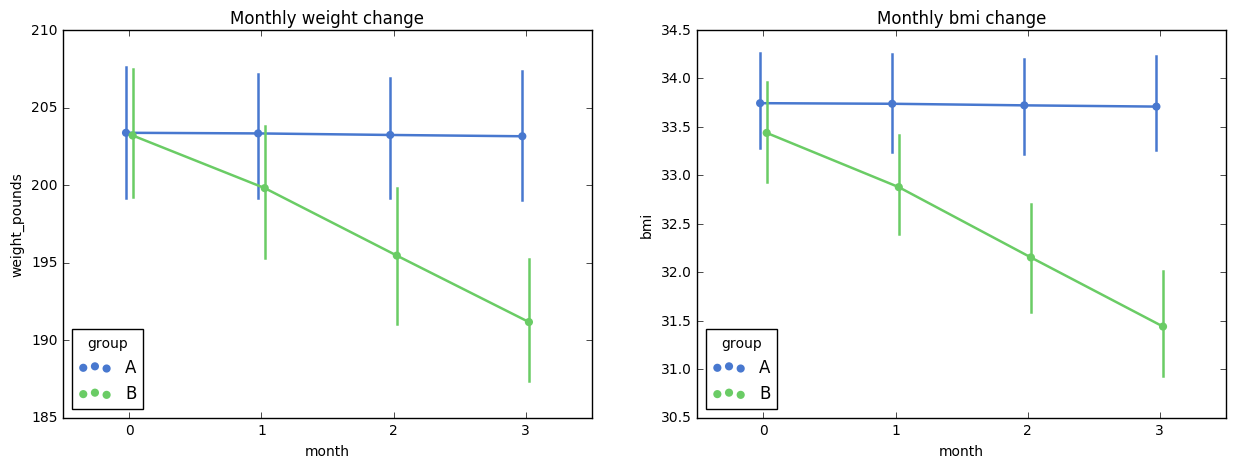

In [52]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

weight_plot = sns.pointplot(x='month', y='weight_pounds', palette='muted', hue='group', data=df_weight, dodge=True, ax=ax1)
weight_plot.set(xticklabels=[0, 1, 2, 3])
ax1.set_title('Monthly weight change')
bmi_plot = sns.pointplot(x='month', y='bmi', palette='muted', hue='group', data=df_bmi, dodge=True, ax=ax2)
bmi_plot.set(xticklabels=[0, 1, 2, 3])
ax2.set_title('Monthly bmi change')
plt.show()

# IV. Conclusion

Although significance was achieved on the second month, the experiment must be conducted its entire duration, else run the risk of Type I errors (false positive). In this case the pre-determined timeframe was three months, which was derived from practical and theoretical standpoints. Practical considerations include resources available to run the tests and participants' availability, among others. Theoretical considerations include the length of time significant results can be observed in a weight loss program as recorded in scientific literature. However, as stated earlier significance in this experiment points to the app not necessarily being the cause of the weight loss, but rather there is probably not a no-app effect. Further tests can be conducted to isolate the app's effect or to determine the true cause of the weight loss.

If the experiment went the other way and results were insignificant, the first point to consider is the sample categories or segments. As pointed out on the first month's results, the Simpson's paradox could explain how the segmented effect is being canceled out by the overall effect, i.e., the results within ethnicities may be different from the overall trend. Depending on resource availability and other factors, the experiment can be conducted for another three months, after which a decision can be made, if the results remain insignificant, to end the experiment and conclude the app to be ineffective.

Lastly, in place of the t-test, a z-test could have been conducted in this case since it passes the criteria to do so, namely: known standard deviations (from the randomly generated population) and a large sample size (greater than 30).